In [1]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
# ดึงข้อมูลหุ้น AOT
stock_symbol = "CPALL.BK"  # สำหรับตลาดหลักทรัพย์ไทย (SET)
df = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK
Date,,,,,
2023-01-03,67.515671,67.515671,66.301360,66.544222,29888800
2023-01-04,67.029945,68.001394,67.029945,67.758532,21285400
2023-01-05,67.029945,67.758532,66.787083,67.272807,14858700
2023-01-06,68.244255,68.972841,67.272807,67.515669,31641400
2023-01-09,70.915733,71.644320,69.458561,69.458561,49965700


In [7]:
# เช็คข้อมูลที่หายไป
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Price   Ticker  
Close   CPALL.BK    0
High    CPALL.BK    0
Low     CPALL.BK    0
Open    CPALL.BK    0
Volume  CPALL.BK    0
dtype: int64


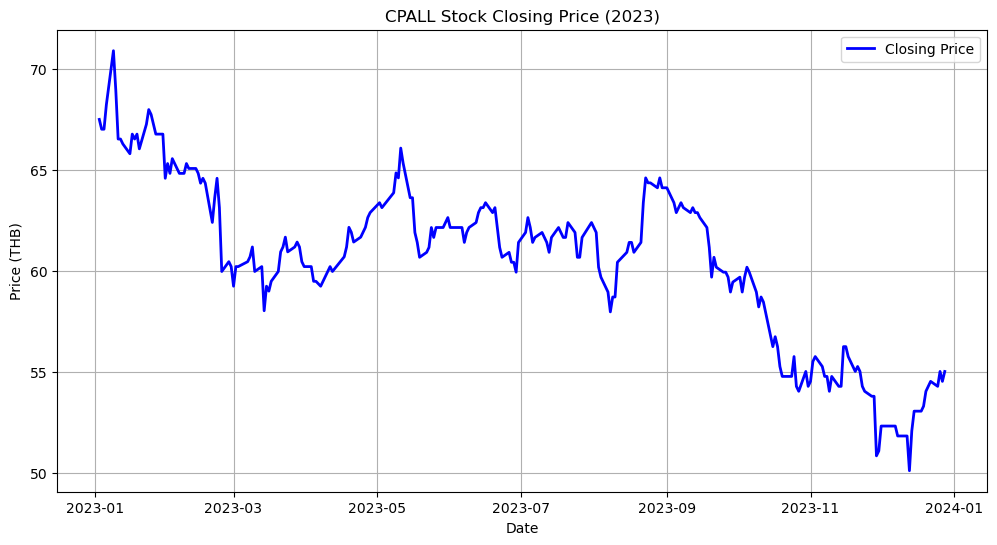

In [11]:
# สร้างกราฟราคาปิดของหุ้น AOT
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2, color='blue')

plt.title("CPALL Stock Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()

# แสดงกราฟ
plt.show()

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


data = df[["Close"]].values

# สเกลข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ฟังก์ชันสร้างชุดข้อมูลแบบ Time Series
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# ตั้งค่าช่วงเวลา 60 วันย้อนหลังเพื่อพยากรณ์วันถัดไป
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# แบ่ง Train-Test (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# แปลงให้เป็นรูปแบบที่เหมาะสมกับ LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer="adam", loss="mean_squared_error")

# เทรนโมเดล
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

# ทำการพยากรณ์ปี 2024
future_days = 365  # จำนวนวันที่ต้องการทำนาย
future_predictions = []

# ใช้ข้อมูล 60 วันสุดท้ายเป็นจุดเริ่มต้น
last_60_days = scaled_data[-time_step:].reshape(1, time_step, 1)

for _ in range(future_days):
    pred = model.predict(last_60_days, verbose=0)
    pred = pred.reshape(1, 1, 1)  # แปลงให้มีขนาด 3 มิติ
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[:, 1:, :], pred, axis=1)

# แปลงค่ากลับเป็นราคาหุ้นจริง
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# แปลง last_date ให้เป็น datetime
last_date = pd.to_datetime(df.index[-1])

# สร้างช่วงวันที่สำหรับปี 2024
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')

Epoch 1/50
10/10 [==============================] - 1s 15ms/step - loss: 0.0915
Epoch 2/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0163
Epoch 3/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0112
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0082
Epoch 5/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0084
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0075
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0076
Epoch 8/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 9/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0073
Epoch 10/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0074
Epoch 11/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 12/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0062
Epoch 13/50
10/10 [==================

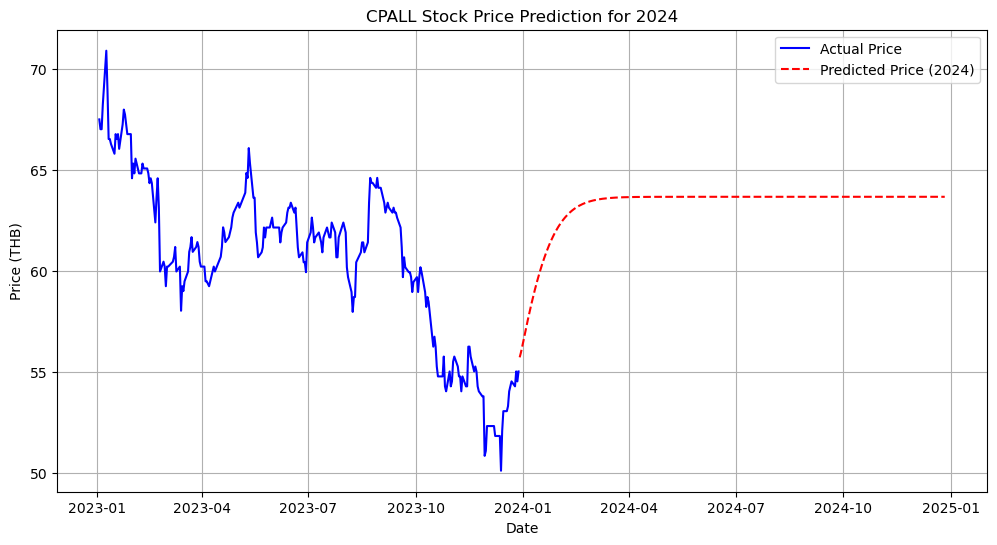

In [13]:
# ตรวจสอบและแปลง df.index และ future_dates เป็น datetime
df.index = pd.to_datetime(df.index, errors="coerce")
future_dates = pd.to_datetime(future_dates, errors="coerce")

# วาดกราฟทำนายราคาหุ้นปี 2024
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Price", color="blue")
plt.plot(future_dates, future_predictions, label="Predicted Price (2024)", color="red", linestyle="dashed")
plt.title("CPALL Stock Price Prediction for 2024")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()
plt.show()

In [15]:
# ดึงข้อมูลหุ้น 
stock_symbol = "CPALL.BK"  # สำหรับตลาดหลักทรัพย์ไทย (SET)
df2 = yf.download(stock_symbol, start="2024-01-01", end="2024-12-31")
df2.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK,CPALL.BK
Date,,,,,
2024-01-03,54.792919,55.775752,54.547211,55.775752,17781400
2024-01-04,55.038628,55.284336,54.055795,54.547211,21277000
2024-01-05,54.547211,55.284335,54.055794,54.792919,36798200
2024-01-08,54.301502,54.547210,53.564378,54.301502,21102800
2024-01-09,53.564377,54.792918,53.318669,54.547209,16519400


In [16]:
# สร้าง DataFrame สำหรับผลลัพธ์การพยากรณ์
predicted_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Price": future_predictions.flatten()
})
predicted_df.head()

,Date,Predicted Price
0,2023-12-29,55.737541
1,2023-12-30,55.962051
2,2023-12-31,56.221767
3,2024-01-01,56.496635
4,2024-01-02,56.776230


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ทำนายค่าทดสอบ
Y_pred = model.predict(X_test)

# แปลงค่าทำนายกลับเป็นราคาจริง
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))
Y_pred_inv = scaler.inverse_transform(Y_pred)

# คำนวณ MSE, RMSE, MAE
mse = mean_squared_error(Y_test_inv, Y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_inv, Y_pred_inv)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 2.1638
Root Mean Squared Error (RMSE): 1.4710
Mean Absolute Error (MAE): 1.1567
